## Python for Data Analysis - C02

### 3. Baby Names (2000 - 2010)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
names2000 = pd.read_csv('data/yob2000.txt', names=['name', 'sex', 'births'])
names2000.head()

,name,sex,births
0,Emily,F,25949
1,Hannah,F,23066
2,Madison,F,19965
3,Ashley,F,17991
4,Sarah,F,17677


In [4]:
names2000.shape

(29758, 3)

In [5]:
names2000.groupby('sex').births.sum()

sex
F    1813960
M    1961702
Name: births, dtype: int64

### 년도별 데이터 합치기

In [27]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [29]:
for year in years:
    path = 'data/names/yob%d.txt' % year
    df = pd.read_csv(path, names=columns)

    df['year'] = year
    pieces.append(df)

In [30]:
# 하나의 dataframe으로 취합. 
names = pd.concat(pieces, ignore_index=True)  # ignore_index : 원래의 행순서 상관없음.
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [31]:
names.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [34]:
total = names.groupby(['year', 'sex']).births.sum()
total.head(10)

year  sex
1880  F       90993
      M      110493
1881  F       91955
      M      100748
1882  F      107851
      M      113687
1883  F      112322
      M      104632
1884  F      129021
      M      114445
Name: births, dtype: int64

In [35]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [37]:
# 성별, 연도별 출생 트렌드

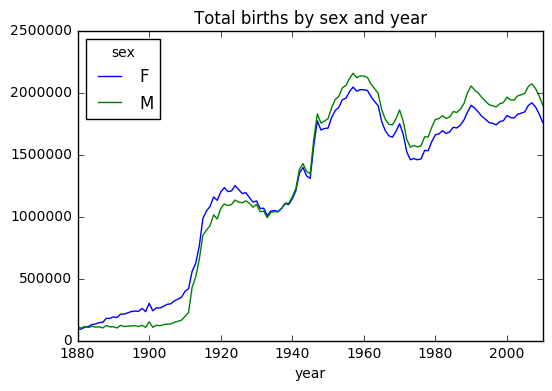

In [36]:
total_births.plot(title='Total births by sex and year')